**DNA sequence and protein sequenc  analysis of covid-19, sars, mers virus
fasta data link:**

https://www.ncbi.nlm.nih.gov/nuccore/NC_045512.2?report=fasta


https://www.ncbi.nlm.nih.gov/nuccore/NC_004718.3?report=fasta
https://www.ncbi.nlm.nih.gov/nuccore/NC_019843.3?report=fasta

In [ ]:
!mkdir -p drive
!google-drive-ocamlfuse drive


In [ ]:
!cp -rf drive/Colab/DNA/mers_sequence.fasta .
!cp -rf drive/Colab/DNA/sars_sequence.fasta .
!cp -rf drive/Colab/DNA/covid19_sequence.fasta .



In [ ]:
!pip install biopython

     |████████████████████████████████| 2.3MB 2.7MB/s 


In [ ]:
from Bio import SeqIO
from Bio.SeqUtils import GC
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
covid19 = SeqIO.read("covid19_sequence.fasta","fasta")
mers = SeqIO.read("mers_sequence.fasta","fasta")
sars = SeqIO.read("sars_sequence.fasta","fasta")


In [ ]:
covid19_sequence = covid19.seq
mers_sequence  = mers.seq
sars_sequence  = sars.seq

In [ ]:
print("Length of covid19_sequence is ",len(covid19_sequence))
print("Length of mers_sequence is",len(mers_sequence))
print("Length of sars_sequence is",len(sars_sequence))


Length of covid19_sequence is  29903
Length of mers_sequence is 30119
Length of sars_sequence is 29751


In [ ]:
print("Portion of GC(guanine-cytosine content) in covid19_sequence is ",GC(covid19_sequence))
print("Portion of GC(guanine-cytosine content) in mers_sequence is",GC(mers_sequence))
print("Portion of GC(guanine-cytosine content) in sars_sequence is",GC(sars_sequence))


Portion of GC(guanine-cytosine content) in covid19_sequence is  37.97277865097148
Portion of GC(guanine-cytosine content) in mers_sequence is 41.23642883229855
Portion of GC(guanine-cytosine content) in sars_sequence is 40.7616550704178


**As DNA with high GC content is more stable than DNA with low GC content. So, here mers is more stable than other viruses**

**Protein analysis of these three virus**

In [ ]:
covid19_protein_seq = covid19_sequence.translate()
mers_protein_seq = mers_sequence.translate()
sars_protein_seq = sars_sequence.translate()

/usr/local/lib/python3.6/dist-packages/Bio/Seq.py:2742: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


**Frequency of Amino acids in these three viruses**

In [ ]:
covid19_ac_freq = Counter(covid19_protein_seq)
mers_ac_freq = Counter(mers_protein_seq)
sars_ac_freq = Counter(sars_protein_seq)


**Bar chart of covid-19's amino acids frequncy**

Text(0, 0.5, 'Frequency')

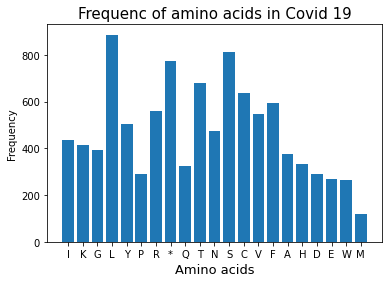

In [ ]:
plt.bar(covid19_ac_freq.keys(), covid19_ac_freq.values())
plt.title("Frequenc of amino acids in Covid 19", fontsize=15)
plt.xlabel("Amino acids", fontsize=13)
plt.ylabel("Frequency")





**Bar chart of mers's amino acids frequncy**

> Indented block





Text(0, 0.5, 'Frequency')

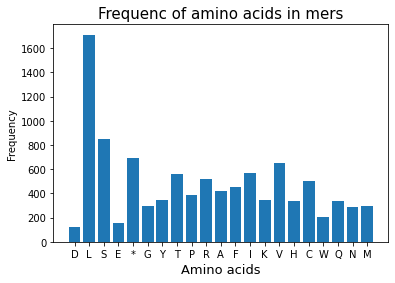

In [ ]:
plt.bar(mers_ac_freq.keys(), mers_ac_freq.values())
plt.title("Frequenc of amino acids in mers", fontsize=15)
plt.xlabel("Amino acids", fontsize=13)
plt.ylabel("Frequency")


**Bar chart of sars's amino acids frequncy**

Text(0, 0.5, 'Frequency')

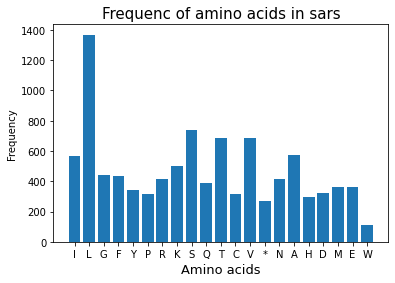

In [ ]:

plt.bar(sars_ac_freq.keys(), sars_ac_freq.values())
plt.title("Frequenc of amino acids in sars", fontsize=15)
plt.xlabel("Amino acids", fontsize=13)
plt.ylabel("Frequency")



**To comparing amino acids frequency in each virus together storing values key wise and key as lists**

In [ ]:
covid_19_aminoacid_frq = []
mers_aminoacid_frq = []
sars_amino_acid_frq = []
labels = []
for key in covid19_ac_freq:
  labels.append(key)
  covid_19_aminoacid_frq.append(covid19_ac_freq[key])
  mers_aminoacid_frq.append(mers_ac_freq[key])
  sars_amino_acid_frq.append(sars_ac_freq[key])



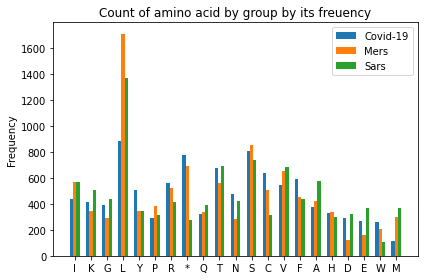

In [ ]:

x = np.arange(len(labels))  # the label locations
width = .2  # the width of the bars

fig, ax = plt.subplots()
ax.bar(x - width, covid_19_aminoacid_frq, width,label='Covid-19')
ax.bar(x , mers_aminoacid_frq,width, label='Mers')
ax.bar(x + width, sars_amino_acid_frq,width, label='Sars')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency')
ax.set_title('Count of amino acid by group by its freuency')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()
plt.show()

**We can see that amino acid L is higher in mers virus among the three virus**